고양이 수염 스티커 만들기
===

얼굴인식 카메라앱을 만들어 보기

## 1. 이미지 준비하기 

고양이 수염 이미지는     
https://www.flaticon.com/free-icon/cat-whiskers_24674?term=cat%20nose&page=1&position=1#    
에서 구할 수 있습니다.  

In [ ]:
# 이미지 처리 관련 패키지들 설치
!pip install opencv-python
!pip install cmake
!pip install dlib

In [1]:
# 필요한 라이브러리를 불러오기
import cv2
import matplotlib.pyplot as plt
import numpy as np

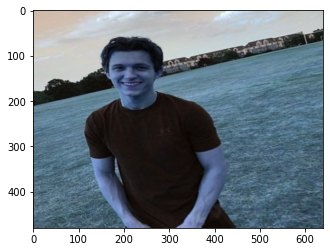

In [2]:
# 이미지 읽기
import os

my_image_path = os.getenv('HOME')+'/aiffel/Exploration/E3/images/img2.png'
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (640, 480))    # 640x480의 크기로 Resize
img_show = img_bgr.copy()      # 출력용 이미지 별도 보관
plt.imshow(img_bgr)
plt.show()

- matplotlib, dlib 등의 이미지 라이브러리는 모두 이미지 채널을 RGB(빨강, 녹색, 파랑) 순으로 사용합니다. 그런데 opencv는 예외적으로 BGR(파랑, 녹색, 빨강)을 사용하기 때문에 색상 순서를 변경해 주어야 합니다. 

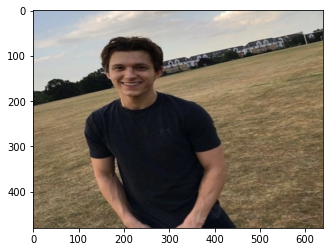

In [3]:
# opencv가 사용하는 BGR --> 원래 색상 RGB로 변경
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

## 2. 얼굴 검출 face detection

Object detection 기술을 이용해서 얼굴의 위치를 찾습니다. 학습 없이 공개되어 있는 패키지(dlib)를 사용합니다.    

dlib 의 face detector는 HOG(Histogram of Oriented Gradient) feature를 사용해서 SVM(Support Vector Machine)의 sliding window로 얼굴을 찾습니다. 

In [4]:
# dlib을 활용해 hog detector를 선언
import dlib
detector_hog = dlib.get_frontal_face_detector()

In [5]:
# detector를 이용해서 먼저 얼굴의 bounding box를 추출
dlib_rects = detector_hog(img_rgb, 1)

- detector_hog(rgb image, num of img pyramid)    
    detector_hog의 첫 번째 파라미터는 rgb 이미지입니다.    
    두 번째 파라미터는 이미지 피라미드의 수입니다.
   
    *이미지 피라미드 :     
upsampling 방법을 통해 크기를 키우는 것.
이미지 피라미드에서 얼굴을 다시 검출하면 작게 촬영된 얼굴을 크게 볼 수 있기 때문에 더 정확한 검출이 가능 

In [6]:
# 찾은 얼굴영역 좌표 찍어보기
print(dlib_rects)

rectangles[[(165, 106) (255, 196)]]


- dlib detector는 dlib.rectangles 타입의 객체를 반환합니다.
- dlib.rectangles는 dlib.rectangle 객체의 배열 형태로 이루어져 있습니다.
- dlib.rectangle 객체는 left(), top(), right(), bottom(), height(), width() 등의 멤버 함수를 포함하고 있습니다. 

In [ ]:
# 찾은 얼굴영역을 green으로 화면에 출력
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    
    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)
    
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

- cv2.rectangle(img, start, end, color, thickness)    
    
    Parameters :    
     img – 그림을 그릴 이미지    
     start – 시작 좌표    
     end – 종료 좌표    
     color – BGR형태의 Color (0, 255, 0) -> Green    
     thickness (int) – 선의 두께. pixel

## 3. 얼굴 랜드마크 face landmark

In [ ]:
# 저장한 landmark 모델을 불러오기
model_path = os.getenv('HOME')+'/aiffel/Exploration/E3/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

In [ ]:
# 이미지의 68개의 랜드마크가 list_landmarks에 저장
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)
    
print(len(list_landmarks[0]))

- landmark_predictor는 RGB 이미지와 dlib.rectangle을 입력받아 dlib.full_object_detection를 반환합니다.
- points는 dlib.full_object_detection의 객체이기 때문에 parts() 함수로 개별 위치에 접근할 수 있습니다. (x, y) 형태로 접근할 수 있도록 변환해 주었습니다.
- list_points는 tuple (x, y) 68개로 이루어진 리스트가 됩니다. 이미지에서 찾아진 얼굴 개수마다 반복하면 list_landmark에 68개의 랜드마크가 얼굴 개수만큼 저장됩니다.
   
\* dlib.full_object_detection   
http://dlib.net/python/index.html#dlib.full_object_detection

In [ ]:
# 랜드마크를 yellow로 이미지에 출력
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)
        
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

- cv2.circle(img, center, radian, color, thickness)

## 4. 스티커 적용하기

### 스티커 적용 위치 확인하기

고양이 수염이 적용 될 볼 위치를 landmark를 사용하여 계산합니다. 
볼은 '턱(2)', '눈(36)', '입(48)', '코(30)' 사이에 있다는 점을 이용합니다. 


In [ ]:
# 좌표를 먼저 확인
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[33]) # nose center index : 30
    x = landmark[33][0]
    y = landmark[33][1]
    w = int( dlib_rect.width() *(4/5) )
    h = dlib_rect.width() // 2
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

In [ ]:
# 준비해 둔 스티커 이미지를 읽어서 출력해보기
import os
sticker_path = os.getenv('HOME')+'/aiffel/Exploration/E3/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

plt.imshow(img_sticker)
plt.show()

- 왕관 이미지를 읽고 윗 단계에서 계산한 크기(w,h)로 resize


In [ ]:
# 원본 이미지에 스티커 이미지를 추가하기 위해서 x, y 좌표를 조정
# 이미지 시작점은 top-left 좌표
refined_x = x - w // 2 # left
refined_y = y - h      # top
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

In [ ]:
img_show

In [ ]:
# 원본 이미지에 스티커를 적용
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
        np.where(img_sticker==255, sticker_area, img_sticker).astype(np.uint8)

In [ ]:
# 결과 이미지를 출력
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
# bounding box와 landmark를 제거하고 최종 결과만 출력
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
        np.where(img_sticker==255, sticker_area, img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()